Name: Reyhan Wiranugraha

Task: Final Project - REA AI Bootcamp Batch 2

Project Title : Employee Attrition Predictions using Transformer Pipeline and DNN Architecture

Business Case:

> In today's competitive job market, retaining top talent is crucial. But many organizations face a hidden enemy: Employee Churn. This refers to the rate at which employees leave a company, creating a costly and disruptive employee life cycle elsewhere.

We will visualize two paths of attributes that affect loyalty and dissatisfaction among employees. The business case is formed around the question: Can we predict those employees who are likely to churn?

References :
> Employee Attrition Prediction Using Deep Neural Networks
https://www.mdpi.com/2073-431X/10/11/141

In [1]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import pprint
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score



# Exploratory Analysis
Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

Load the Dataset
--
Dataset Information: HR Analytics Dataset

Context :
HR Analytics helps us with interpreting organizational data. It finds the people-related trends in the data and allows the HR Department to take the appropriate steps to keep the organization running smoothly and profitably. Attrition in a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with.
dataset source:

https://www.kaggle.com/datasets/jash312/hr-employee-attrition-datasets?select=Employee_office_survey.csv

In [6]:
df = pd.read_csv("Datasets/HR Employee data.csv")

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,3,Male,91,3,3,Married,10492,3411,0,Y,Yes,12,4,3,80,0,39,2,2,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,3,Male,76,3,2,Married,11529,3105,0,Y,Yes,12,3,3,80,0,33,2,2,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,3,Female,78,2,4,Married,10169,14618,0,Y,No,16,4,2,80,1,34,4,3,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,3,Male,86,2,4,Married,10314,3834,1,Y,Yes,11,3,3,80,1,35,3,2,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,3,Male,31,2,2,Married,19255,25762,6,Y,Yes,12,4,4,80,0,39,2,3,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [9]:
df.columns

Index(['EmployeeID', 'JoiningYear', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'LeavingYear', 'Reason', 'RelievingStatus', 'office_code',
       'JobLevel_updated'],
      dtype='object')

In [10]:
# rename column JobLevel_updated to JobLevel
df.rename(columns={'JobLevel_updated': 'JobLevel'}, inplace=True)
df

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,3,Male,91,3,3,Married,10492,3411,0,Y,Yes,12,4,3,80,0,39,2,2,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,3,Male,76,3,2,Married,11529,3105,0,Y,Yes,12,3,3,80,0,33,2,2,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,3,Female,78,2,4,Married,10169,14618,0,Y,No,16,4,2,80,1,34,4,3,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,3,Male,86,2,4,Married,10314,3834,1,Y,Yes,11,3,3,80,1,35,3,2,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,3,Male,31,2,2,Married,19255,25762,6,Y,Yes,12,4,4,80,0,39,2,3,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,1,240,3,Female,72,3,3,Single,2244,6261,1,Y,No,12,3,3,80,0,2,2,2,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13419,113419,2021,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,1,1919,2,Female,55,3,1,Single,2408,25235,2,Y,Yes,11,3,3,80,0,4,4,2,1,1,1,1,No,NaN,NaN,NaN,TOR,L1
13420,113420,2021,36,Travel_Rarely,927,Product,5,Diploma,1,108,3,Female,84,3,2,Single,2384,6796,3,Y,No,15,3,4,80,0,7,2,3,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13421,113421,2021,58,Travel_Rarely,1200,Sales,14,Bachelors,1,1836,1,Male,86,3,2,Married,15796,21641,2,Y,No,14,3,2,80,0,23,2,2,1,1,1,1,No,NaN,NaN,NaN,TOR,L4


## Data Analysis:




In [11]:
df.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,2.388214,6338.864486,14281.290695,2.373985,14.777546,3.108247,2.367504,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,0.956279,4638.789110,7116.133478,2.062765,3.031840,0.667023,0.930938,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,1.000000,1009.000000,2094.000000,0.000000,11.000000,1.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,2.000000,2776.500000,8127.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,2.000000,4790.000000,14273.000000,2.000000,14.000000,3.000000,2.000000,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,3.000000,8147.000000,20475.000000,4.000000,17.000000,3.000000,3.000000,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,4.000000,19999.000000,26999.000000,9.000000,25.000000,5.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


# DNN Approach

## Data Preprocessing

### Perform drop uneeded column

In [12]:
# Drop column EmployeeCount, Over18, and StandardHours, EmployeeNumber
df = df.drop(['JoiningYear','EmployeeID','EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'LeavingYear', 'Reason', 'RelievingStatus', 'office_code'], axis=1)

In [13]:
print("Shape of final DataFrame:", df.shape)
df.head()

Shape of final DataFrame: (13423, 29)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobLevel
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,Yes,L7
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,Yes,L6
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,Yes,L6
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,Yes,L7
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,Yes,L5


### Perform One-Hot Encoding

In [14]:
# Check dataframe shape
df.shape

(13423, 29)

In [15]:
df['Attrition'].value_counts()

Attrition
No     10225
Yes     3198
Name: count, dtype: int64

In [16]:
# Select the categorical columns for one-hot encoding
categorical_columns = [

]

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Perform one-hot encoding on categorical features
encoded_features = onehot_encoder.fit_transform(df[categorical_columns])

# Get the names of the one-hot encoded features
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)

# Convert the sparse matrix to a dense array
encoded_features_dense = encoded_features.toarray()

# Convert encoded features into DataFrame with the correct column names
encoded_df = pd.DataFrame(encoded_features_dense, columns=encoded_feature_names)

# Drop the original categorical columns from the DataFrame
df_encoded = df.drop(columns=categorical_columns)

In [17]:
df_encoded

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobLevel
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,Yes,L7
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,Yes,L6
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,Yes,L6
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,Yes,L7
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,Yes,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,3,Female,72,3,3,Single,2244,6261,1,No,12,3,3,0,2,2,2,1,1,1,1,No,L1
13419,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,2,Female,55,3,1,Single,2408,25235,2,Yes,11,3,3,0,4,4,2,1,1,1,1,No,L1
13420,36,Travel_Rarely,927,Product,5,Diploma,3,Female,84,3,2,Single,2384,6796,3,No,15,3,4,0,7,2,3,1,1,1,1,No,L1
13421,58,Travel_Rarely,1200,Sales,14,Bachelors,1,Male,86,3,2,Married,15796,21641,2,No,14,3,2,0,23,2,2,1,1,1,1,No,L4


In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'BusinessTravel'
df_encoded['BusinessTravel_encoded'] = label_encoder.fit_transform(df['BusinessTravel'])

# Encode 'Department'
df_encoded['Department_encoded'] = label_encoder.fit_transform(df['Department'])

# Encode 'JobLevel'
df_encoded['JobLevel_encoded'] = label_encoder.fit_transform(df['JobLevel'])

# Encode 'EducationField'
df_encoded['EducationField_encoded'] = label_encoder.fit_transform(df['EducationField'])

# Encode 'Gender',
df_encoded['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Encode 'OverTime'
df_encoded['OverTime_encoded'] = label_encoder.fit_transform(df['OverTime'])

# Encode 'MaritalStatus'
df_encoded['MaritalStatus_encoded'] = label_encoder.fit_transform(df['MaritalStatus'])

# Encode 'Attrition'
df_encoded['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])

# Drop the original 'JobLevel' and 'EducationField' columns
df_encoded.drop(columns=['BusinessTravel','Department','JobLevel', 'EducationField', 'Attrition', 'Gender', 'OverTime', 'MaritalStatus'], inplace=True)

# Concatenate the encoded features with the original DataFrame
final_df = pd.concat([df_encoded, encoded_df], axis=1)

# Display the shapes to debug
print(final_df['Attrition_encoded'].value_counts())
print("Shape of original DataFrame:", df.shape)
print("Shape of encoded DataFrame:", encoded_df.shape)
print("Shape of final DataFrame:", final_df.shape)

# Display the final DataFrame
final_df

Attrition_encoded
0    10225
1     3198
Name: count, dtype: int64
Shape of original DataFrame: (13423, 29)
Shape of encoded DataFrame: (13423, 0)
Shape of final DataFrame: (13423, 29)


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
0,57,164,22,3,91,3,3,10492,3411,0,12,4,3,0,39,2,2,14,4,5,3,2,0,6,2,1,1,1,1
1,52,265,19,3,76,3,2,11529,3105,0,12,3,3,0,33,2,2,12,4,5,3,2,0,5,2,1,1,1,1
2,53,607,2,3,78,2,4,10169,14618,0,16,4,2,1,34,4,3,12,3,1,4,2,0,5,2,0,0,1,1
3,54,215,19,3,86,2,4,10314,3834,1,11,3,3,1,35,3,2,13,4,5,3,2,0,6,1,1,1,1,1
4,57,285,2,3,31,2,2,19255,25762,6,12,4,4,0,39,2,3,11,5,5,3,2,3,4,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,36,1266,9,3,72,3,3,2244,6261,1,12,3,3,0,2,2,2,1,1,1,1,1,0,0,1,0,0,2,0
13419,31,424,6,2,55,3,1,2408,25235,2,11,3,3,0,4,4,2,1,1,1,1,2,0,0,0,0,1,2,0
13420,36,927,5,3,84,3,2,2384,6796,3,15,3,4,0,7,2,3,1,1,1,1,2,4,0,1,0,0,2,0
13421,58,1200,14,1,86,3,2,15796,21641,2,14,3,2,0,23,2,2,1,1,1,1,2,5,3,0,1,0,1,0


In [19]:
print(df_encoded["JobSatisfaction"].value_counts().sort_index())

JobSatisfaction
1    2961
2    3872
3    5008
4    1582
Name: count, dtype: int64


### Perform 'Attrition_encoded' rebalance

In [20]:
# Print the value counts of the 'Attrition_encoded' column
print(final_df["Attrition_encoded"].value_counts())

# Step 1: Apply SMOTE to the 'Attrition_encoded' column
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(final_df.drop(columns=['Attrition_encoded']), final_df['Attrition_encoded'])

# Step 2: Create a new DataFrame with the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=final_df.drop(columns=['Attrition_encoded']).columns)
resampled_df['Attrition_encoded'] = y_resampled

# Now 'resampled_df' contains the original data with the 'Attrition_encoded' column rebalanced using SMOTE
print(resampled_df["Attrition_encoded"].value_counts())
print("Shape of init DataFrame:", final_df.shape)
print("Shape of rebalanced DataFrame:", resampled_df.shape)

resampled_df.head()

Attrition_encoded
0    10225
1     3198
Name: count, dtype: int64
Attrition_encoded
1    10225
0    10225
Name: count, dtype: int64
Shape of init DataFrame: (13423, 29)
Shape of rebalanced DataFrame: (20450, 29)


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
0,57,164,22,3,91,3,3,10492,3411,0,12,4,3,0,39,2,2,14,4,5,3,2,0,6,2,1,1,1,1
1,52,265,19,3,76,3,2,11529,3105,0,12,3,3,0,33,2,2,12,4,5,3,2,0,5,2,1,1,1,1
2,53,607,2,3,78,2,4,10169,14618,0,16,4,2,1,34,4,3,12,3,1,4,2,0,5,2,0,0,1,1
3,54,215,19,3,86,2,4,10314,3834,1,11,3,3,1,35,3,2,13,4,5,3,2,0,6,1,1,1,1,1
4,57,285,2,3,31,2,2,19255,25762,6,12,4,4,0,39,2,3,11,5,5,3,2,3,4,1,1,1,1,1


In [21]:
print(resampled_df["BusinessTravel_encoded"].value_counts().sort_index())

BusinessTravel_encoded
0      412
1     3615
2    16423
Name: count, dtype: int64


### Perform min-max normalization

In [22]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns to be normalized
columns_to_normalize = ['Age',
                        'BusinessTravel_encoded',
                        'Department_encoded',
                        'EducationField_encoded',
                        'DailyRate',
                        'DistanceFromHome',
                        'EnvironmentSatisfaction',
                        'HourlyRate',
                        'JobInvolvement',
                        'JobLevel_encoded',
                        'JobSatisfaction',
                        'MonthlyIncome',
                        'MonthlyRate',
                        'NumCompaniesWorked',
                        'PercentSalaryHike',
                        'PerformanceRating',
                        'RelationshipSatisfaction',
                        'StockOptionLevel',
                        'TotalWorkingYears',
                        'TrainingTimesLastYear',
                        'WorkLifeBalance',
                        'YearsAtCompany',
                        'YearsInCurrentRole',
                        'YearsSinceLastPromotion',
                        'YearsWithCurrManager',
                        'Attrition_encoded',
                        'Gender_encoded',
                        'OverTime_encoded',
                        'MaritalStatus_encoded'
                        ]

# Perform min-max normalization on selected columns
final_df = resampled_df.copy()
final_df[columns_to_normalize] = scaler.fit_transform(final_df[columns_to_normalize])

# Display the first few rows of the normalized dataset
print("Shape of resampled DataFrame:", resampled_df.shape)
print("Shape of final DataFrame:", final_df.shape)
final_df.head()

Shape of resampled DataFrame: (20450, 29)
Shape of final DataFrame: (20450, 29)


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
0,0.928571,0.044381,0.750000,0.666667,0.871429,0.666667,0.666667,0.499368,0.052881,0.000000,0.071429,0.75,0.666667,0.000000,0.975,0.333333,0.333333,0.928571,0.500000,0.8,0.4,1.0,0.0,1.000000,0.666667,1.0,1.0,0.5,1.0
1,0.809524,0.116679,0.642857,0.666667,0.657143,0.666667,0.333333,0.553976,0.040594,0.000000,0.071429,0.50,0.666667,0.000000,0.825,0.333333,0.333333,0.785714,0.500000,0.8,0.4,1.0,0.0,0.833333,0.666667,1.0,1.0,0.5,1.0
2,0.833333,0.361489,0.035714,0.666667,0.685714,0.333333,1.000000,0.482359,0.502871,0.000000,0.357143,0.75,0.333333,0.333333,0.850,0.666667,0.666667,0.785714,0.333333,0.0,0.6,1.0,0.0,0.833333,0.666667,0.0,0.0,0.5,1.0
3,0.857143,0.080888,0.642857,0.666667,0.800000,0.333333,1.000000,0.489995,0.069865,0.111111,0.000000,0.50,0.666667,0.333333,0.875,0.500000,0.333333,0.857143,0.500000,0.8,0.4,1.0,0.0,1.000000,0.333333,1.0,1.0,0.5,1.0
4,0.928571,0.130995,0.035714,0.666667,0.014286,0.333333,0.333333,0.960821,0.950331,0.666667,0.071429,0.75,1.000000,0.000000,0.975,0.333333,0.666667,0.714286,0.666667,0.8,0.4,1.0,0.6,0.666667,0.333333,1.0,1.0,0.5,1.0


## Visualization

### Correlation Matrix

The correlation matrix is usually used to understand the relationship among the dataset features. Correlation Heat-map below depicts the correlation matrix of our dataset. The cell colors vary from blue to red color. Grey cells represent no correlation, while red variations represent the high correlation. Blue variations represent a negative correlation among dataset features.

In [23]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Display the correlation matrix
correlation_matrix

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
Age,1.000000,0.013280,0.012195,0.025915,0.071280,0.092444,0.042192,0.566186,-0.020042,0.296677,-0.009399,-0.003867,0.115891,0.109057,0.724648,-0.005238,0.013956,0.437650,0.330086,0.288340,0.313624,0.056437,-0.034495,0.571731,0.025455,0.070385,-0.144806,-0.122638,-0.236880
DailyRate,0.013280,1.000000,-0.049736,0.018025,0.040413,0.066985,0.041543,-0.008145,-0.098996,0.064386,0.012565,0.008065,0.005925,0.047524,0.014333,0.005158,0.002031,-0.036318,0.003718,-0.041453,-0.019005,0.007847,0.021829,-0.022947,0.013432,0.045008,0.007519,-0.084083,-0.104981
DistanceFromHome,0.012195,-0.049736,1.000000,-0.030227,0.005939,-0.010150,-0.043426,0.003316,0.058351,-0.040423,0.087054,-0.018042,-0.000021,0.040569,-0.005504,-0.060158,-0.046292,-0.017826,-0.009852,-0.009818,-0.003526,-0.060502,0.002751,0.016403,-0.006196,-0.010992,-0.013003,0.022906,0.088450
EnvironmentSatisfaction,0.025915,0.018025,-0.030227,1.000000,-0.022695,0.129722,0.077456,0.016618,0.022452,-0.070098,0.031092,0.002532,0.037074,0.049071,0.028763,0.051297,0.063759,0.060997,0.080076,0.047328,0.073910,-0.005132,0.022202,0.041121,0.029064,-0.044811,-0.103453,-0.018937,-0.245104
HourlyRate,0.071280,0.040413,0.005939,-0.022695,1.000000,0.061216,-0.089988,-0.009975,-0.006678,0.030662,-0.015462,0.011868,0.020637,0.012434,0.008995,0.037317,-0.012849,-0.001435,-0.021406,-0.049069,-0.022281,-0.008434,-0.016274,-0.001841,-0.008272,-0.011671,-0.016622,-0.023054,-0.041831
JobInvolvement,0.092444,0.066985,-0.010150,0.129722,0.061216,1.000000,0.029249,0.037755,-0.037697,-0.010328,0.022994,-0.000261,0.043368,0.091811,0.047501,0.048424,0.066458,0.037934,0.052603,0.025977,0.074531,0.041935,0.021253,0.031682,0.050973,-0.016698,-0.116251,0.034026,-0.286566
JobSatisfaction,0.042192,0.041543,-0.043426,0.077456,-0.089988,0.029249,1.000000,0.048878,0.081853,-0.044836,-0.027954,0.013932,0.072909,0.087204,0.051205,0.044078,0.013396,0.072827,0.060595,0.021176,0.039295,0.039511,0.018488,0.080007,0.045457,0.033368,-0.082081,-0.086862,-0.242041
MonthlyIncome,0.566186,-0.008145,0.003316,0.016618,-0.009975,0.037755,0.048878,1.000000,0.045022,0.168254,-0.049789,-0.012643,0.081390,0.055927,0.812435,-0.013042,0.053830,0.606764,0.456945,0.414798,0.440216,0.108361,-0.030230,0.925113,0.039304,0.030174,-0.185345,-0.116660,-0.241759
MonthlyRate,-0.020042,-0.098996,0.058351,0.022452,-0.006678,-0.037697,0.081853,0.045022,1.000000,0.011464,0.016946,0.019721,-0.001730,-0.056374,-0.011412,-0.022157,-0.008259,-0.072888,-0.047276,-0.052696,-0.098443,-0.032495,-0.010129,0.036978,0.002890,-0.054017,-0.060050,-0.011050,0.022430
NumCompaniesWorked,0.296677,0.064386,-0.040423,-0.070098,0.030662,-0.010328,-0.044836,0.168254,0.011464,1.000000,-0.037884,0.020664,0.086205,0.073223,0.244348,-0.018149,-0.015989,-0.043981,-0.033418,-0.010460,-0.052516,0.004329,0.010950,0.134404,-0.007922,-0.003924,0.005040,-0.016077,0.044498


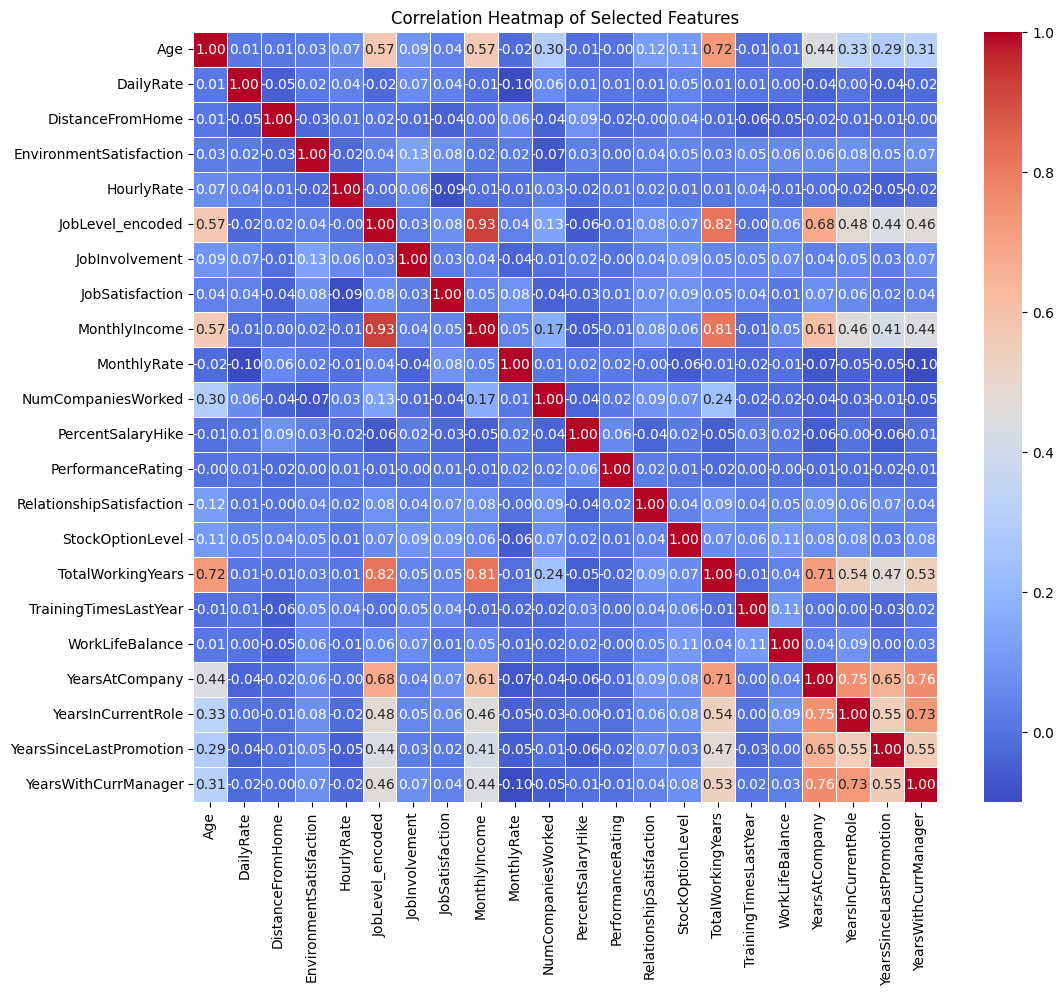

In [24]:
import seaborn as sns

# Select the columns for the heatmap
selected_columns_for_heatmap = [
    'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobLevel_encoded','JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Calculate the correlation matrix for selected columns
correlation_matrix_heatmap = final_df[selected_columns_for_heatmap].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

#### By analysing the correlation matrix, we observe the following findings:
- “MonthlyIncome” is highly correlated with the “JobLevel”
- “PerformanceRating” is correlated with “PercentSalaryHike”
- “TotalWorkingYears” is correlated with “JobLevel” and “MonthlyIncome”
- “YearsAtCompany” is correlated with “YearsInCurrentRole" and “YearsWithCurrentManager”
- “TotalWorkingYears” is correlated with “Age”
- “YeasAtCompany” is moderately correlated with “YearsSinceLastPromotion” and “TotalWorkingYears”

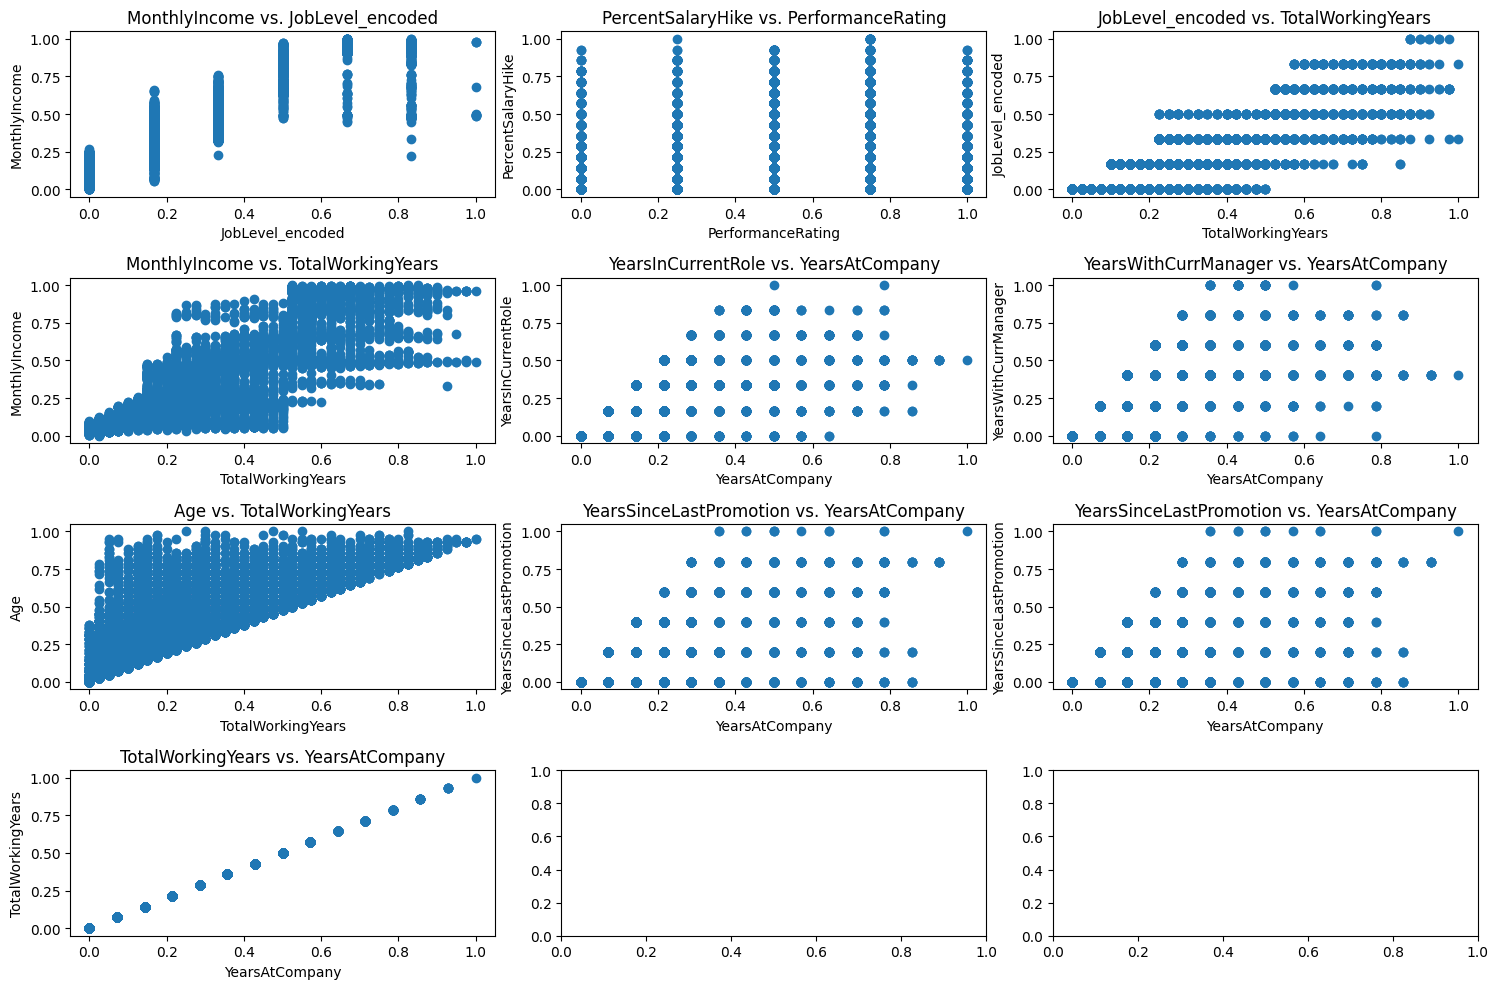

In [25]:
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
flat_axes = axes.ravel()

# Feature names for the chosen pair
feature1 = "MonthlyIncome"
feature2 = "JobLevel_encoded"
# Extract data for the chosen features
data_subset1 = final_df[[feature1, feature2]]
# Create the scatter plot
flat_axes[0].scatter(data_subset1[feature2], data_subset1[feature1])
flat_axes[0].set_xlabel(feature2)
flat_axes[0].set_ylabel(feature1)
flat_axes[0].set_title(f"{feature1} vs. {feature2}")

# Feature names for the chosen pair
feature3 = "PercentSalaryHike"
feature4 = "PerformanceRating"
# Extract data for the chosen features
data_subset2 = final_df[[feature3, feature4]]
# Create the scatter plot
flat_axes[1].scatter(data_subset2[feature4], data_subset2[feature3])
flat_axes[1].set_xlabel(feature4)
flat_axes[1].set_ylabel(feature3)
flat_axes[1].set_title(f"{feature3} vs. {feature4}")

# Feature names for the chosen pair
feature5 = "JobLevel_encoded"
feature6 = "TotalWorkingYears"
# Extract data for the chosen features
data_subset3 = final_df[[feature5, feature6]]
# Create the scatter plot
flat_axes[2].scatter(data_subset3[feature6], data_subset3[feature5])
flat_axes[2].set_xlabel(feature6)
flat_axes[2].set_ylabel(feature5)
flat_axes[2].set_title(f"{feature5} vs. {feature6}")

# Feature names for the chosen pair
feature5 = "MonthlyIncome"
feature6 = "TotalWorkingYears"
# Extract data for the chosen features
data_subset4 = final_df[[feature5, feature6]]
# Create the scatter plot
flat_axes[3].scatter(data_subset4[feature6], data_subset4[feature5])
flat_axes[3].set_xlabel(feature6)
flat_axes[3].set_ylabel(feature5)
flat_axes[3].set_title(f"{feature5} vs. {feature6}")

# Feature names for the chosen pair
feature7 = "YearsInCurrentRole"
feature8 = "YearsAtCompany"
# Extract data for the chosen features
data_subset5 = final_df[[feature7, feature8]]
# Create the scatter plot
flat_axes[4].scatter(data_subset5[feature8], data_subset5[feature7])
flat_axes[4].set_xlabel(feature8)
flat_axes[4].set_ylabel(feature7)
flat_axes[4].set_title(f"{feature7} vs. {feature8}")

# Feature names for the chosen pair
feature9 = "YearsWithCurrManager"
feature10 = "YearsAtCompany"
# Extract data for the chosen features
data_subset6 = final_df[[feature9, feature10]]
# Create the scatter plot
flat_axes[5].scatter(data_subset6[feature10], data_subset6[feature9])
flat_axes[5].set_xlabel(feature10)
flat_axes[5].set_ylabel(feature9)
flat_axes[5].set_title(f"{feature9} vs. {feature10}")

# Feature names for the chosen pair
feature11 = "Age"
feature12 = "TotalWorkingYears"
# Extract data for the chosen features
data_subset7 = final_df[[feature11, feature12]]
# Create the scatter plot
flat_axes[6].scatter(data_subset7[feature12], data_subset7[feature11])
flat_axes[6].set_xlabel(feature12)
flat_axes[6].set_ylabel(feature11)
flat_axes[6].set_title(f"{feature11} vs. {feature12}")

# Feature names for the chosen pair
feature13 = "YearsSinceLastPromotion"
feature14 = "YearsAtCompany"
# Extract data for the chosen features
data_subset7 = final_df[[feature13, feature14]]
# Create the scatter plot
flat_axes[7].scatter(data_subset7[feature14], data_subset7[feature13])
flat_axes[7].set_xlabel(feature14)
flat_axes[7].set_ylabel(feature13)
flat_axes[7].set_title(f"{feature13} vs. {feature14}")

# Feature names for the chosen pair
feature13 = "YearsSinceLastPromotion"
feature14 = "YearsAtCompany"
# Extract data for the chosen features
data_subset7 = final_df[[feature13, feature14]]
# Create the scatter plot
flat_axes[8].scatter(data_subset7[feature14], data_subset7[feature13])
flat_axes[8].set_xlabel(feature14)
flat_axes[8].set_ylabel(feature13)
flat_axes[8].set_title(f"{feature13} vs. {feature14}")

# Feature names for the chosen pair
feature15 = "TotalWorkingYears"
feature16 = "YearsAtCompany"
# Extract data for the chosen features
data_subset8 = final_df[[feature15, feature16]]
# Create the scatter plot
flat_axes[9].scatter(data_subset8[feature16], data_subset8[feature14])
flat_axes[9].set_xlabel(feature16)
flat_axes[9].set_ylabel(feature15)
flat_axes[9].set_title(f"{feature15} vs. {feature16}")

# Show plot
plt.tight_layout()
plt.show()

### Correlation Matrix Calculation

In [26]:
# Calculate the correlation matrix
correlation_matrix = final_df.corr()

# Specify the target variable
target_variable = 'Attrition_encoded'

# Get the correlation coefficients of features with the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Sort features by correlation (absolute value) with the target variable in descending order
important_features_correlation = correlation_with_target.abs().sort_values(ascending=False)

print("Important Features based on Correlation with", target_variable, "(absolute value):")
print(important_features_correlation)

Important Features based on Correlation with Attrition_encoded (absolute value):
OverTime_encoded            0.439712
JobInvolvement              0.286566
TotalWorkingYears           0.260185
YearsInCurrentRole          0.248750
StockOptionLevel            0.245144
EnvironmentSatisfaction     0.245104
JobLevel_encoded            0.243319
JobSatisfaction             0.242041
MonthlyIncome               0.241759
Age                         0.236880
YearsWithCurrManager        0.235296
YearsAtCompany              0.211085
WorkLifeBalance             0.181133
MaritalStatus_encoded       0.178794
BusinessTravel_encoded      0.161570
TrainingTimesLastYear       0.155854
RelationshipSatisfaction    0.126075
EducationField_encoded      0.120349
DailyRate                   0.104981
DistanceFromHome            0.088450
Gender_encoded              0.079701
Department_encoded          0.078727
PercentSalaryHike           0.072219
YearsSinceLastPromotion     0.051051
NumCompaniesWorked          0.0

In [27]:
print("Shape of final DataFrame:", final_df.shape)
final_df.head()

Shape of final DataFrame: (20450, 29)


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
0,0.928571,0.044381,0.750000,0.666667,0.871429,0.666667,0.666667,0.499368,0.052881,0.000000,0.071429,0.75,0.666667,0.000000,0.975,0.333333,0.333333,0.928571,0.500000,0.8,0.4,1.0,0.0,1.000000,0.666667,1.0,1.0,0.5,1.0
1,0.809524,0.116679,0.642857,0.666667,0.657143,0.666667,0.333333,0.553976,0.040594,0.000000,0.071429,0.50,0.666667,0.000000,0.825,0.333333,0.333333,0.785714,0.500000,0.8,0.4,1.0,0.0,0.833333,0.666667,1.0,1.0,0.5,1.0
2,0.833333,0.361489,0.035714,0.666667,0.685714,0.333333,1.000000,0.482359,0.502871,0.000000,0.357143,0.75,0.333333,0.333333,0.850,0.666667,0.666667,0.785714,0.333333,0.0,0.6,1.0,0.0,0.833333,0.666667,0.0,0.0,0.5,1.0
3,0.857143,0.080888,0.642857,0.666667,0.800000,0.333333,1.000000,0.489995,0.069865,0.111111,0.000000,0.50,0.666667,0.333333,0.875,0.500000,0.333333,0.857143,0.500000,0.8,0.4,1.0,0.0,1.000000,0.333333,1.0,1.0,0.5,1.0
4,0.928571,0.130995,0.035714,0.666667,0.014286,0.333333,0.333333,0.960821,0.950331,0.666667,0.071429,0.75,1.000000,0.000000,0.975,0.333333,0.666667,0.714286,0.666667,0.8,0.4,1.0,0.6,0.666667,0.333333,1.0,1.0,0.5,1.0


In [28]:
# Check if there any null value
final_df.isnull().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
BusinessTravel_encoded      0
Department_encoded          0
JobLevel_encoded            0
EducationField_encoded      0
Gender_encoded              0
OverTime_encoded            0
MaritalStatus_encoded       0
Attrition_encoded           0
dtype: int64

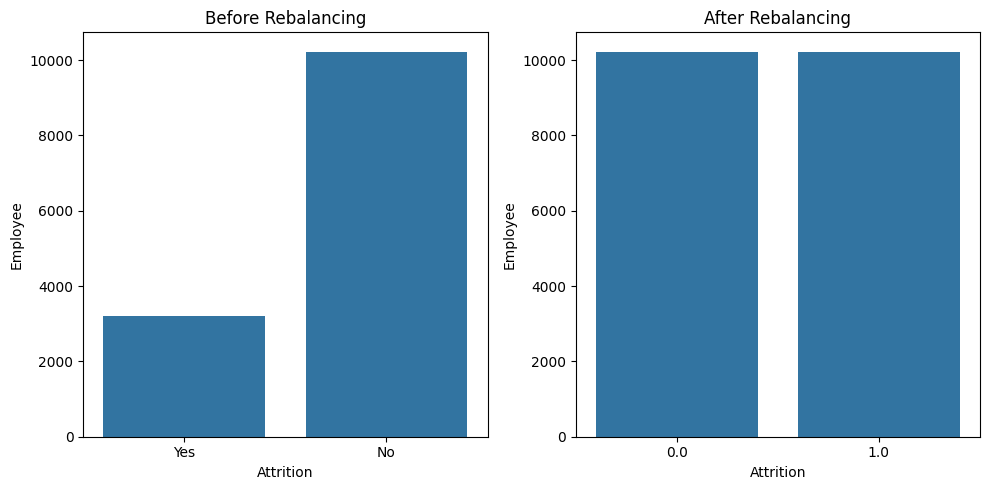

In [29]:
# Plot the distribution of the target variable before and after rebalancing
plt.figure(figsize=(10, 5))

# Before rebalancing
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Attrition')
plt.title('Before Rebalancing')
plt.xlabel('Attrition')
plt.ylabel('Employee')

# After rebalancing
plt.subplot(1, 2, 2)
sns.countplot(data=final_df, x='Attrition_encoded')
plt.title('After Rebalancing')
plt.xlabel('Attrition')
plt.ylabel('Employee')

plt.tight_layout()
plt.show()

## There are much parameter affecting employee churn

*  Lack of career development opportunities: Employees often seek opportunities
for career growth and development. When organizations fail to provide clear paths for advancement or invest in employee training and skill development, individuals may become dissatisfied and seek opportunities elsewhere.

*  Inadequate compensation and benefits: Compensation and benefits play a significant role in employee satisfaction. If employees feel that their pay and benefits are not competitive or fair compared to industry standards, they may be more inclined to explore other opportunities that offer better financial rewards.

*  Poor management and leadership: Ineffective or unsupportive management can contribute to high turnover. Employees may leave if they feel undervalued, unappreciated, or if there is a lack of clear communication and leadership within the organization. A positive and supportive managerial approach is crucial for retaining talent.

*  Unhealthy work environment: A toxic or unhealthy work environment can drive employees away. Factors such as workplace harassment, discrimination, excessive stress, or a lack of work-life balance can negatively impact job satisfaction and contribute to a higher likelihood of turnover.

*  Insufficient recognition and feedback: Employees who feel their contributions are not acknowledged or appreciated may become disengaged. Regular feedback, recognition programs, and a positive work culture that values and celebrates achievements are essential for employee retention.

*  Limited flexibility and work-life balance: In today's workforce, flexibility and work-life balance are increasingly important. Organizations that do not offer flexible work arrangements or fail to support a healthy balance between work and personal life may experience higher turnover, especially among employees seeking more flexibility.

*  Mismatched job expectations: If there is a significant disconnect between what employees expect from their roles and what the organization delivers, it can lead to dissatisfaction and increased turnover. Clear communication during the hiring process and ongoing dialogue about job expectations can help mitigate this factor.

*  Lack of employee engagement: Engaged employees are more likely to stay with an organization. When there is a lack of engagement, whether due to uninteresting work, a disconnected company culture, or a perceived lack of purpose, employees may be more prone to seek opportunities elsewhere.

## Fit and Evaluate Model

### Approach_1

In [30]:
final_df

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_encoded,Department_encoded,JobLevel_encoded,EducationField_encoded,Gender_encoded,OverTime_encoded,MaritalStatus_encoded,Attrition_encoded
0,0.928571,0.044381,0.750000,0.666667,0.871429,0.666667,0.666667,0.499368,0.052881,0.000000,0.071429,0.75,0.666667,0.000000,0.975,0.333333,0.333333,0.928571,0.500000,0.8,0.4,1.0,0.0,1.000000,0.666667,1.0,1.0,0.5,1.0
1,0.809524,0.116679,0.642857,0.666667,0.657143,0.666667,0.333333,0.553976,0.040594,0.000000,0.071429,0.50,0.666667,0.000000,0.825,0.333333,0.333333,0.785714,0.500000,0.8,0.4,1.0,0.0,0.833333,0.666667,1.0,1.0,0.5,1.0
2,0.833333,0.361489,0.035714,0.666667,0.685714,0.333333,1.000000,0.482359,0.502871,0.000000,0.357143,0.75,0.333333,0.333333,0.850,0.666667,0.666667,0.785714,0.333333,0.0,0.6,1.0,0.0,0.833333,0.666667,0.0,0.0,0.5,1.0
3,0.857143,0.080888,0.642857,0.666667,0.800000,0.333333,1.000000,0.489995,0.069865,0.111111,0.000000,0.50,0.666667,0.333333,0.875,0.500000,0.333333,0.857143,0.500000,0.8,0.4,1.0,0.0,1.000000,0.333333,1.0,1.0,0.5,1.0
4,0.928571,0.130995,0.035714,0.666667,0.014286,0.333333,0.333333,0.960821,0.950331,0.666667,0.071429,0.75,1.000000,0.000000,0.975,0.333333,0.666667,0.714286,0.666667,0.8,0.4,1.0,0.6,0.666667,0.333333,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20445,0.690476,0.563350,0.107143,0.666667,0.642857,0.333333,0.666667,0.206530,0.596467,0.333333,0.142857,0.75,0.666667,0.000000,0.125,0.500000,0.666667,0.000000,0.000000,0.0,0.0,1.0,0.6,0.166667,0.000000,1.0,0.0,0.5,1.0
20446,0.333333,0.216893,0.285714,0.333333,0.285714,0.333333,0.000000,0.070142,0.329934,0.000000,0.714286,0.00,0.000000,0.000000,0.075,0.000000,0.666667,0.000000,0.000000,0.0,0.0,0.5,0.4,0.000000,0.666667,1.0,1.0,0.0,1.0
20447,0.261905,0.503937,0.000000,0.333333,0.085714,0.333333,0.000000,0.069247,0.184100,0.111111,0.000000,0.00,0.666667,0.333333,0.025,0.166667,0.333333,0.000000,0.000000,0.0,0.0,0.5,0.6,0.000000,0.333333,0.0,1.0,1.0,1.0
20448,0.309524,0.100931,0.107143,0.000000,0.242857,0.666667,0.333333,0.073776,0.531018,0.333333,0.214286,0.75,0.000000,0.000000,0.175,0.333333,0.666667,0.071429,0.000000,0.0,0.0,0.5,0.0,0.000000,0.333333,0.0,1.0,0.5,1.0


In [31]:
# print(df["TotalWorkingYears"].value_counts())

In [32]:
# Rename 'BusinessTravel_encoded', 'Department_encoded', 'EducationField_encoded', 'MaritalStatus_encoded', 'Attrition_encoded'
final_df.rename(columns={'BusinessTravel_encoded': 'BusinessTravel',
                          'Department_encoded': 'Department',
                          'EducationField_encoded': 'EducationField',
                          'MaritalStatus_encoded': 'MaritalStatus',
                          'Attrition_encoded': 'Attrition',
                          'JobLevel_encoded': 'JobLevel',
                          'Gender_encoded': 'Gender',
                          'OverTime_encoded': 'OverTime'}, inplace=True)

In [33]:
print(final_df["BusinessTravel"].value_counts().sort_index())

BusinessTravel
0.0      412
0.5     3615
1.0    16423
Name: count, dtype: int64


### Deep Neural Network Approach

In [34]:
class DNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, 1)
        self.activation = nn.ReLU()  # Changed activation to ReLU for hidden layers
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.activation(self.fc1(x))
        out = self.activation(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out

net = DNN(input_size=21, hidden_size1=10, hidden_size2=5)
print(net)

def load_dataset():
    X = final_df[['Age',
                  'BusinessTravel',
                  'Department',
                  'EducationField',
                  'Gender',
                  'MaritalStatus',
                  'JobLevel',
                  'OverTime',
                  'JobInvolvement',
                  'PerformanceRating',
                  'MonthlyIncome',
                  'TotalWorkingYears',
                  'TrainingTimesLastYear',
                  'WorkLifeBalance',
                  'YearsAtCompany',
                  'YearsInCurrentRole',
                  'YearsSinceLastPromotion',
                  'YearsWithCurrManager',
                  'JobSatisfaction',
                  'RelationshipSatisfaction',
                  'EnvironmentSatisfaction',]].values  # Features
    y = final_df['Attrition'].values  # Target variable

    # Perform standardization on the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert labels to float32 to match the datatype of the model output
    y = y.astype(np.float32)

    return X, y

# Print X_train shape
X_train, y_train = load_dataset()

print(X_train.shape)
print(y_train.shape)

def train_model(model, criterion, optimizer, train_loader):
    model.train()  # Set the model to training mode
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

def evaluate_model(model, criterion, test_loader):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():  # Disable gradient computation during evaluation
        for inputs, targets in test_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets.unsqueeze(1))  # Calculate the loss

            # Compute accuracy
            predicted = (outputs >= 0.1).float()  # Convert probabilities to binary predictions
            total += targets.size(0)
            correct += (predicted == targets.unsqueeze(1)).sum().item()

            y_true.extend(targets.numpy())  # No need to move tensor to CPU
            y_pred.extend(predicted.numpy())  # No need to move tensor to CPU

            running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_accuracy = 100 * correct / total

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Precision:", precision, "| Recall:", recall, "| F1-Score:", f1)

    return epoch_accuracy

def run_experiment(repeats=10):
    accuracies = []
    # repeat experiment
    for r in range(repeats):
        # Load and preprocess data
        X_train, y_train = load_dataset()
        X_test, y_test = load_dataset()  # Assuming you have separate test data

        # Move data to the CPU
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        # Define model and optimizer
        model = net
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adjust learning rate as needed

        # Train the model
        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
        train_model(model, criterion, optimizer, train_loader)

        # Evaluate the model
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)
        accuracy = evaluate_model(model, criterion, test_loader)
        accuracies.append(accuracy)

        print(f"Experiment {r+1} Accuracy: {accuracy:.2f}%")
        print("")

    # Calculate and print the average accuracy over all experiments
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average Accuracy over {repeats} experiments: {average_accuracy:.2f}%")
    print("")
    # Print model's state_dict and OrderedDict

    # Save the model
    # with open("churn-model.pickle", "wb") as fp:
    #     pickle.dump(model, fp)

    # torch.save(net.state_dict(), "state_dict_churn_model.pt")

    torch.save(net, "churn-model-full.pt")

    print("Model Saved!")


# run the experiment
run_experiment()

DNN(
  (fc1): Linear(in_features=21, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
)
(20450, 21)
(20450,)


Precision: 0.9034841810172206 | Recall: 0.8825427872860636 | F1-Score: 0.892890713896997
Experiment 1 Accuracy: 89.41%

Precision: 0.9482006543075245 | Recall: 0.8503667481662591 | F1-Score: 0.8966228409383862
Experiment 2 Accuracy: 90.20%

Precision: 0.9519555507135854 | Recall: 0.8545721271393643 | F1-Score: 0.9006390434961864
Experiment 3 Accuracy: 90.57%

Precision: 0.9416159675525669 | Recall: 0.8627872860635697 | F1-Score: 0.900479738695519
Experiment 4 Accuracy: 90.46%

Precision: 0.9388447270800212 | Recall: 0.8663080684596577 | F1-Score: 0.901119023397762
Experiment 5 Accuracy: 90.49%

Precision: 0.9375979931012857 | Recall: 0.8772616136919316 | F1-Score: 0.90642683912692
Experiment 6 Accuracy: 90.94%

Precision: 0.9539280669346952 | Recall: 0.8585819070904646 | F1-Score: 0.9037471690343833
Experiment 7 Accuracy: 90.86%

Precision: 0.9456049199448627 | Recall: 0.8721760391198043 | F1-Score: 0.9074074074074074
Experiment 8 Accuracy: 91.10%

Precision: 0.9630793401413983 | Recal

# Logistic Regression Approach

## Data Preprocessing

In [35]:
# Step 1: Classify the output of mean probability into bins
def calculate_mean_prob(df, feat):
    """Calculates mean probability for a feature value and bins it."""
    # Bins from the automatic rules from numpy
    bins = np.histogram_bin_edges(df[feat], bins='auto')
    binned_values = pd.cut(df[feat], bins)
    return df['MonthlyIncome'].groupby(binned_values).mean()

# Step 2: Classify the output of each bin into a income group
def classify_probability(prob, medium=0.5, high=0.8, fillna_method='ffill'):
    """Classify the output of each bin into a risk group based on the probability."""
    group_class = pd.cut(prob, [0., medium, high, 1.0], include_lowest=True, labels=['Low', 'Medium', 'High'])
    group_class.fillna(method=fillna_method, inplace=True)
    return group_class

# Step 3: Merge consecutive bins
def sum_interval(i1, i2):
    if i2 is None:
        return None
    if i1.right == i2.left:
        return pd.Interval(i1.left, i2.right)
    return None

def sum_intervals(args):
    """Sum consecutive intervals."""
    result = []
    current_interval = args[0]

    for next_interval in args[1:] + [None]:
        sum_int = sum_interval(current_interval, next_interval)
        if sum_int is not None:
            current_interval = sum_int
        else:
            result.append(current_interval)
            current_interval = next_interval

    if len(result) == 1:
        return result[0]
    return result

def combine_bins(df):
    """Combine consecutive bins."""
    grouped = df.groupby('MonthlyIncome').apply(lambda x: sorted(list(x.index)))
    merged_intervals = grouped.apply(sum_intervals)
    return merged_intervals

# Step 4: Generate income classes for each feature
def generate_income_class(df, feature, medium=0.5, high=0.8):
    """Generate risk classes for each feature."""
    mean_prob = calculate_mean_prob(df, feature)
    classification = classify_probability(mean_prob, medium=medium, high=high)
    merged_bins = combine_bins(classification)
    return merged_bins

# Generate income classes for 'MonthlyIncome'
income_classes = generate_income_class(df, 'MonthlyIncome')
print("Income classes for 'MonthlyIncome':", income_classes)

Income classes for 'MonthlyIncome': MonthlyIncome
(1009.0, 1450.628]            (1009.0, 1450.628]
(1450.628, 1892.256]        (1450.628, 1892.256]
(1892.256, 2333.884]        (1892.256, 2333.884]
(2333.884, 2775.512]        (2333.884, 2775.512]
(2775.512, 3217.14]          (2775.512, 3217.14]
(3217.14, 3658.767]          (3217.14, 3658.767]
(3658.767, 4100.395]        (3658.767, 4100.395]
(4100.395, 4542.023]        (4100.395, 4542.023]
(4542.023, 4983.651]        (4542.023, 4983.651]
(4983.651, 5425.279]        (4983.651, 5425.279]
(5425.279, 5866.907]        (5425.279, 5866.907]
(5866.907, 6308.535]        (5866.907, 6308.535]
(6308.535, 6750.163]        (6308.535, 6750.163]
(6750.163, 7191.791]        (6750.163, 7191.791]
(7191.791, 7633.419]        (7191.791, 7633.419]
(7633.419, 8075.047]        (7633.419, 8075.047]
(8075.047, 8516.674]        (8075.047, 8516.674]
(8516.674, 8958.302]        (8516.674, 8958.302]
(8958.302, 9399.93]          (8958.302, 9399.93]
(9399.93, 9841.558]

C:\Users\reyha\AppData\Local\Temp\ipykernel_6444\373107291.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df['MonthlyIncome'].groupby(binned_values).mean()
C:\Users\reyha\AppData\Local\Temp\ipykernel_6444\373107291.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group_class.fillna(method=fillna_method, inplace=True)
C:\Users\reyha\AppData\Local\Temp\ipykernel_6444\373107291.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('MonthlyIncome').apply(lambda x: sorted(list(x.index)))


In [36]:
# Define the bins and labels for grouping
bins = [1000, 5000, 10000, float('inf')]
labels = ['Low', 'Medium', 'High']

# Group the 'MonthlyIncome' column into categories
df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

# Print the dataframe
print(df['IncomeCategory'].value_counts())

IncomeCategory
Low       7079
Medium    3854
High      2490
Name: count, dtype: int64


In [37]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobLevel,IncomeCategory
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,Yes,L7,High
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,Yes,L6,High
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,Yes,L6,High
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,Yes,L7,High
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,Yes,L5,High


## Checking if there is any duplicate values

In [38]:
# Checking the dataset if there any duplicate values
df.duplicated().any()
# Show the duplicates value
df[df.duplicated()]
# Drop the duplicate value
dataset = df.drop_duplicates()

In [39]:
dataset.shape

(13423, 30)

## Changing the value of row that is not numeric, into numeric

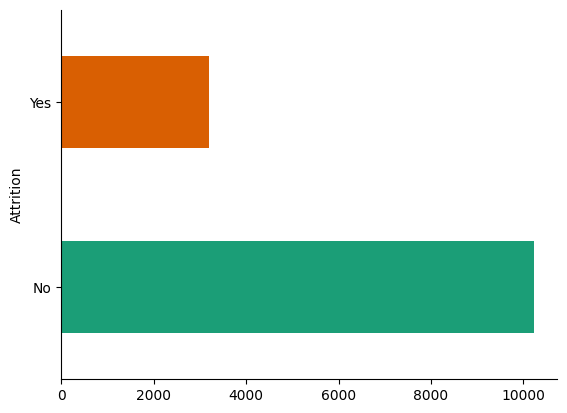

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,JobLevel,IncomeCategory
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,Yes,L7,High
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,Yes,L6,High
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,Yes,L6,High
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,Yes,L7,High
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,Yes,L5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,3,Female,72,3,3,Single,2244,6261,1,No,12,3,3,0,2,2,2,1,1,1,1,No,L1,Low
13419,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,2,Female,55,3,1,Single,2408,25235,2,Yes,11,3,3,0,4,4,2,1,1,1,1,No,L1,Low
13420,36,Travel_Rarely,927,Product,5,Diploma,3,Female,84,3,2,Single,2384,6796,3,No,15,3,4,0,7,2,3,1,1,1,1,No,L1,Low
13421,58,Travel_Rarely,1200,Sales,14,Bachelors,1,Male,86,3,2,Married,15796,21641,2,No,14,3,2,0,23,2,2,1,1,1,1,No,L4,High


In [42]:
# Select the categorical columns for one-hot encoding
categorical_columns = [

]

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Perform one-hot encoding on categorical features
encoded_features = onehot_encoder.fit_transform(df[categorical_columns])

# Get the names of the one-hot encoded features
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)

# Convert the sparse matrix to a dense array
encoded_features_dense = encoded_features.toarray()

# Convert encoded features into DataFrame with the correct column names
encoded_df = pd.DataFrame(encoded_features_dense, columns=encoded_feature_names)

# Drop the original categorical columns from the DataFrame
df_encoded = df.drop(columns=categorical_columns)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender', 'OverTime', and 'Attrition'
df_encoded['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])

# Convert to int64
df_encoded['Attrition_encoded'] = df_encoded['Attrition_encoded'].astype('int64')

# Drop the encoded columns
df_encoded.drop(columns=['Attrition'], inplace=True)

# Concatenate the encoded features with the original DataFrame
final_df = pd.concat([df_encoded, encoded_df], axis=1)

In [43]:
# Rename 'Attrition_encoded', 'Gender_encoded', 'OverTime_encoded' to 'Attrition', 'Gender', 'OverTime'
final_df = final_df.rename(columns={'Attrition_encoded': 'Attrition'})

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       13423 non-null  int64   
 1   BusinessTravel            13423 non-null  object  
 2   DailyRate                 13423 non-null  int64   
 3   Department                13423 non-null  object  
 4   DistanceFromHome          13423 non-null  int64   
 5   EducationField            13423 non-null  object  
 6   EnvironmentSatisfaction   13423 non-null  int64   
 7   Gender                    13423 non-null  object  
 8   HourlyRate                13423 non-null  int64   
 9   JobInvolvement            13423 non-null  int64   
 10  JobSatisfaction           13423 non-null  int64   
 11  MaritalStatus             13423 non-null  object  
 12  MonthlyIncome             13423 non-null  int64   
 13  MonthlyRate               13423 non-null  int6

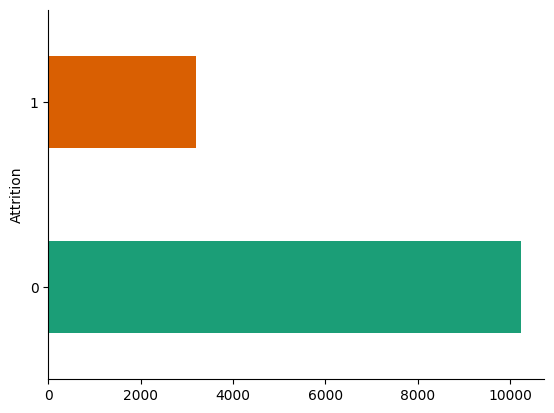

In [45]:
# Checking the Attrition
from matplotlib import pyplot as plt
import seaborn as sns
final_df.groupby('Attrition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
final_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,IncomeCategory,Attrition
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,L7,High,1
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,L6,High,1
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,L6,High,1
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,L7,High,1
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,L5,High,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,3,Female,72,3,3,Single,2244,6261,1,No,12,3,3,0,2,2,2,1,1,1,1,L1,Low,0
13419,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,2,Female,55,3,1,Single,2408,25235,2,Yes,11,3,3,0,4,4,2,1,1,1,1,L1,Low,0
13420,36,Travel_Rarely,927,Product,5,Diploma,3,Female,84,3,2,Single,2384,6796,3,No,15,3,4,0,7,2,3,1,1,1,1,L1,Low,0
13421,58,Travel_Rarely,1200,Sales,14,Bachelors,1,Male,86,3,2,Married,15796,21641,2,No,14,3,2,0,23,2,2,1,1,1,1,L4,High,0


## Column Transformer and Pipeline

### Store feature matrix in X and Target into vector y

In [47]:
X = final_df.drop(columns=['Attrition'])
y = final_df['Attrition']


In [48]:
final_df.head(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobLevel,IncomeCategory,Attrition
0,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,3,Male,91,3,3,Married,10492,3411,0,Yes,12,4,3,0,39,2,2,14,4,5,3,L7,High,1
1,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,3,Male,76,3,2,Married,11529,3105,0,Yes,12,3,3,0,33,2,2,12,4,5,3,L6,High,1
2,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,3,Female,78,2,4,Married,10169,14618,0,No,16,4,2,1,34,4,3,12,3,1,4,L6,High,1
3,54,Travel_Rarely,215,Corporate Functions,19,Diploma,3,Male,86,2,4,Married,10314,3834,1,Yes,11,3,3,1,35,3,2,13,4,5,3,L7,High,1
4,57,Travel_Rarely,285,Marketing,2,Diploma,3,Male,31,2,2,Married,19255,25762,6,Yes,12,4,4,0,39,2,3,11,5,5,3,L5,High,1
5,57,Travel_Rarely,224,Corporate Functions,21,Masters,3,Male,93,2,3,Married,10322,3392,1,Yes,12,3,4,1,38,2,2,14,4,5,3,L7,High,1
6,50,Travel_Rarely,528,Corporate Functions,2,Diploma,2,Female,79,2,4,Married,10557,14410,1,No,15,3,2,1,31,4,3,11,3,1,3,L6,High,1
7,52,Travel_Rarely,590,Corporate Functions,2,Diploma,2,Male,76,2,4,Divorced,10163,14718,0,No,15,4,1,1,33,3,3,11,3,1,3,L6,High,1
8,58,Travel_Rarely,147,Delivery,23,Diploma,4,Female,94,3,4,Married,10312,3465,1,No,12,2,4,1,40,3,2,15,4,6,3,L3,High,1
9,57,Travel_Rarely,305,Marketing,2,Masters,4,Male,33,3,1,Married,19272,25562,6,No,12,3,4,0,39,2,3,11,5,5,3,L5,High,1


In [49]:
# @title Column Transformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['JobInvolvement',
                                'PerformanceRating',
                                'MonthlyIncome',
                                'TotalWorkingYears',
                                'TrainingTimesLastYear',
                                'WorkLifeBalance',
                                'YearsAtCompany',
                                'YearsInCurrentRole',
                                'YearsSinceLastPromotion',
                                'YearsWithCurrManager',
                                'JobSatisfaction',
                                'RelationshipSatisfaction',
                                'EnvironmentSatisfaction',
                                
                                ]),
    ('nominal',OneHotEncoder(),[
                                'BusinessTravel',
                                'Department',
                                'EducationField',
                                'MaritalStatus',
                                'JobLevel',
                                'Gender',
                                'OverTime'
                                ])
],remainder='drop')

In [50]:
# @title Pipeline

pipeline = Pipeline([
          ('preprocessor', preprocessor),
          ('model', LogisticRegression())
          ])

from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['JobInvolvement',
                                                   'PerformanceRating',
                                                   'MonthlyIncome',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'JobSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'EnvironmentSatisfaction']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'MaritalStatus', 'JobLevel',
                                                   'Gender', 'OverTime'])])),
                ('model', LogisticRegression())])

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['JobInvolvement',
                                                   'PerformanceRating',
                                                   'MonthlyIncome',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'JobSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'EnvironmentSatisfaction']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'MaritalStatus', 'JobLevel',
                                                   'Gender', 'OverTime'])])),
                ('model', LogisticRegression())])

In [53]:
y_pred = pipeline.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.8733705772811918

In [55]:
precision_score(y_test,y_pred)

0.8164556962025317

In [56]:
recall_score(y_test,y_pred)

0.6046875

In [57]:
def model_scorer(model_name,model):

    output=[]

    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

In [58]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
}

In [59]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [60]:
model_output

[['log', 0.8733705772811918, 0.8164556962025317, 0.6046875],
 ['decision_tree', 0.9184357541899442, 0.8174962292609351, 0.846875],
 ['random_forest', 0.9564245810055866, 0.956369982547993, 0.85625],
 ['XGB', 0.964245810055866, 0.9657534246575342, 0.88125]]

In [61]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['JobInvolvement',
                                'PerformanceRating',
                                'MonthlyIncome',
                                'TotalWorkingYears',
                                'TrainingTimesLastYear',
                                'WorkLifeBalance',
                                'YearsAtCompany',
                                'YearsInCurrentRole',
                                'YearsSinceLastPromotion',
                                'YearsWithCurrManager',
                                'JobSatisfaction',
                                'RelationshipSatisfaction',
                                'EnvironmentSatisfaction',
                                
                                ]),
    ('nominal',OneHotEncoder(),[
                                'BusinessTravel',
                                'Department',
                                'EducationField',
                                'MaritalStatus',
                                'JobLevel',
                                'OverTime',
                                'Gender',
                                ])
],remainder='drop')

In [62]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
])

In [63]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['JobInvolvement',
                                                   'PerformanceRating',
                                                   'MonthlyIncome',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'JobSatisfaction',
                                                   'RelationshipSatisfaction',
                                                   'EnvironmentSatisfaction']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField',
                                                   'MaritalStatus', 'JobLevel',
                                                   'OverTime', 'Gender'])])),
                ('model', RandomForestClassifier())])

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, 5737 to 1264
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       10738 non-null  int64   
 1   BusinessTravel            10738 non-null  object  
 2   DailyRate                 10738 non-null  int64   
 3   Department                10738 non-null  object  
 4   DistanceFromHome          10738 non-null  int64   
 5   EducationField            10738 non-null  object  
 6   EnvironmentSatisfaction   10738 non-null  int64   
 7   Gender                    10738 non-null  object  
 8   HourlyRate                10738 non-null  int64   
 9   JobInvolvement            10738 non-null  int64   
 10  JobSatisfaction           10738 non-null  int64   
 11  MaritalStatus             10738 non-null  object  
 12  MonthlyIncome             10738 non-null  int64   
 13  MonthlyRate               10738 non-null  int64  

In [65]:
sample = pd.DataFrame({ 'Age':28,
                                'BusinessTravel':'Travel_Rarely',
                                'Department':'HR',
                                'EducationField':'Bachelors',
                                'Gender':'Male',
                                'MaritalStatus':'Single',
                                'JobLevel':'L3',
                                'OverTime':'No',
                                'JobInvolvement':3,
                                'PerformanceRating':3,
                                'MonthlyIncome':5000,
                                'TotalWorkingYears':10,
                                'TrainingTimesLastYear':2,
                                'WorkLifeBalance':3,
                                'YearsAtCompany':3,
                                'YearsInCurrentRole':3,
                                'YearsSinceLastPromotion':1,
                                'YearsWithCurrManager':3,
                                'JobSatisfaction':3,
                                'RelationshipSatisfaction':3,
                                'EnvironmentSatisfaction':3,
                               
},index=[0])

In [66]:
sample

,Age,BusinessTravel,Department,EducationField,Gender,MaritalStatus,JobLevel,OverTime,JobInvolvement,PerformanceRating,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction
0,28,Travel_Rarely,HR,Bachelors,Male,Single,L3,No,3,3,5000,10,2,3,3,3,1,3,3,3,3


In [67]:
result = pipeline.predict(sample)

if result == 0:
  print("An Employee may leave the organization/company")
else:
  print("An Employee may stay with the organization/company")

An Employee may leave the organization/company


### Save Model

In [68]:
with open('pipeline.pkl','wb') as f:
  pickle.dump(pipeline,f)

In [69]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [70]:
result = pipeline.predict(sample)

if result == 1:
  print("An Employee may leave the organization/company")
else:
  print("An Employee may stay with the organization/company")

An Employee may stay with the organization/company
